## <div style="text-align: center; background-color: black; font-family:Cursive; color: white; padding: 14px; line-height: 1;border-radius:20px">📊  Exploratory Data Analysis (EDA) on Data Science Job Salaries</div><img src="https://storage.googleapis.com/kaggle-datasets-images/2268489/3806098/4a3ac5daca0a8182dd06b54cc75c822a/dataset-cover.png?t=2022-06-15-09-05-09" alt="drawing" width="300"/>

<h3 style="text-align: left;background-color: #7a0459; font-family:Cursive; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset 📁</h3>

<h4>Data Science Job Salaries Dataset contains <span style="color:red">11 columns</span>:</h4>


| no  | Column  | Description  |
|----|:---|:---|
| 1  | <b><mark>work_year</mark></b>  | The year the salary was paid.  |
| 2  | <b><mark>experience_level</mark></b>	  | The experience level in the job during the year.  |
| 3  | <b><mark>employment_type</mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b>  |  The type of employment for the role. |
| 4  | <b><mark>job_title</mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b> | The role worked in during the year. |
| 5  | <b><mark>salary</mark></b></mark></b></mark></b></mark></b></mark></b></mark></b></mark></b>  | The total gross salary amount paid.  |
| 6  | <b><mark>salary_currency</mark></b></mark></b></mark></b></mark></b></mark></b></mark></b>  | The currency of the salary paid as an ISO 4217 currency code.  |
| 7  | <b><mark>salaryinusd</mark></b></mark></b></mark></b></mark></b></mark></b>  | The salary in USD.  |
| 8  | <b><mark>employee_residence</mark></b></mark></b></mark></b></mark></b>  | Employee's primary country of residence in during the work year as an ISO 3166 country code.  |
| 9  | <b><mark>remote_ratio</mark></b></mark></b></mark></b>  |  The overall amount of work done remotely. |
| 10 |  <b><mark>company_location</mark></b></mark></b> |  The country of the employer's main office or contracting branch. |
| 11 |  <b><mark>company_size</mark></b> |  The median number of people that worked for the company during the year. |

<h3 style="text-align: left;background-color: #7a0459; font-family:Cursive; color: white; padding: 14px; line-height: 1; border-radius:10px">Notebook Objectives 🎯</h3>

<h4>Goal of the notebook is to:</h4>

1. 📊Explore <b><mark>every feature</mark></b> in the dataset; <br>

2. 🗓<b><mark>Work Year Analysis</mark></b>(with <b>Salary, Remote Ratio</b>);<br>

3. 📝<b><mark>Experience Level Analysis</mark></b> (with <b>Employment Type, Top 3 Job Title, Company Size</b>);

4. 🗺️<b><mark>Company Location Analysis</mark></b> (with <b>Experience Level</b>)

5. 💰<b><mark>Salary Analysis</mark></b> (with <b> Work Year, Experience Level, Company Size, Job Title, Remote Ratio</b>)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #7a0459; font-family:Cursive; color: white; padding: 14px; line-height: 1; border-radius:10px">
        <b>Table of Contents📝</b>
    </h3>

   * <b>[1. Import Necessary Libraries](#1)</b>
   * <b>[2. Read and Knowing Dataset](#2)</b>
    </div>

<a id="1"></a>
### <div style="text-align: center; background-color: #13065e; font-family:Cursive; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

In [49]:
# data
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import missingno as msno

# style
from numpy import unique
%matplotlib inline

<a id="2"></a>
### <div style="text-align: center; background-color: #13065e; font-family:Cursive; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Read and Knowing Dataset</div>

In [50]:
# read data and create dataframe
df = pd.read_csv("../data_given/ds_salaries.csv", index_col=0)
# show first 5 columns
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [51]:
# data type of all the columns
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [52]:
# check missing values in the columns
print(f"Total NULL values: {df.isnull().sum().sum()}\n")
print(df.isnull().sum())

Total NULL values: 0

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


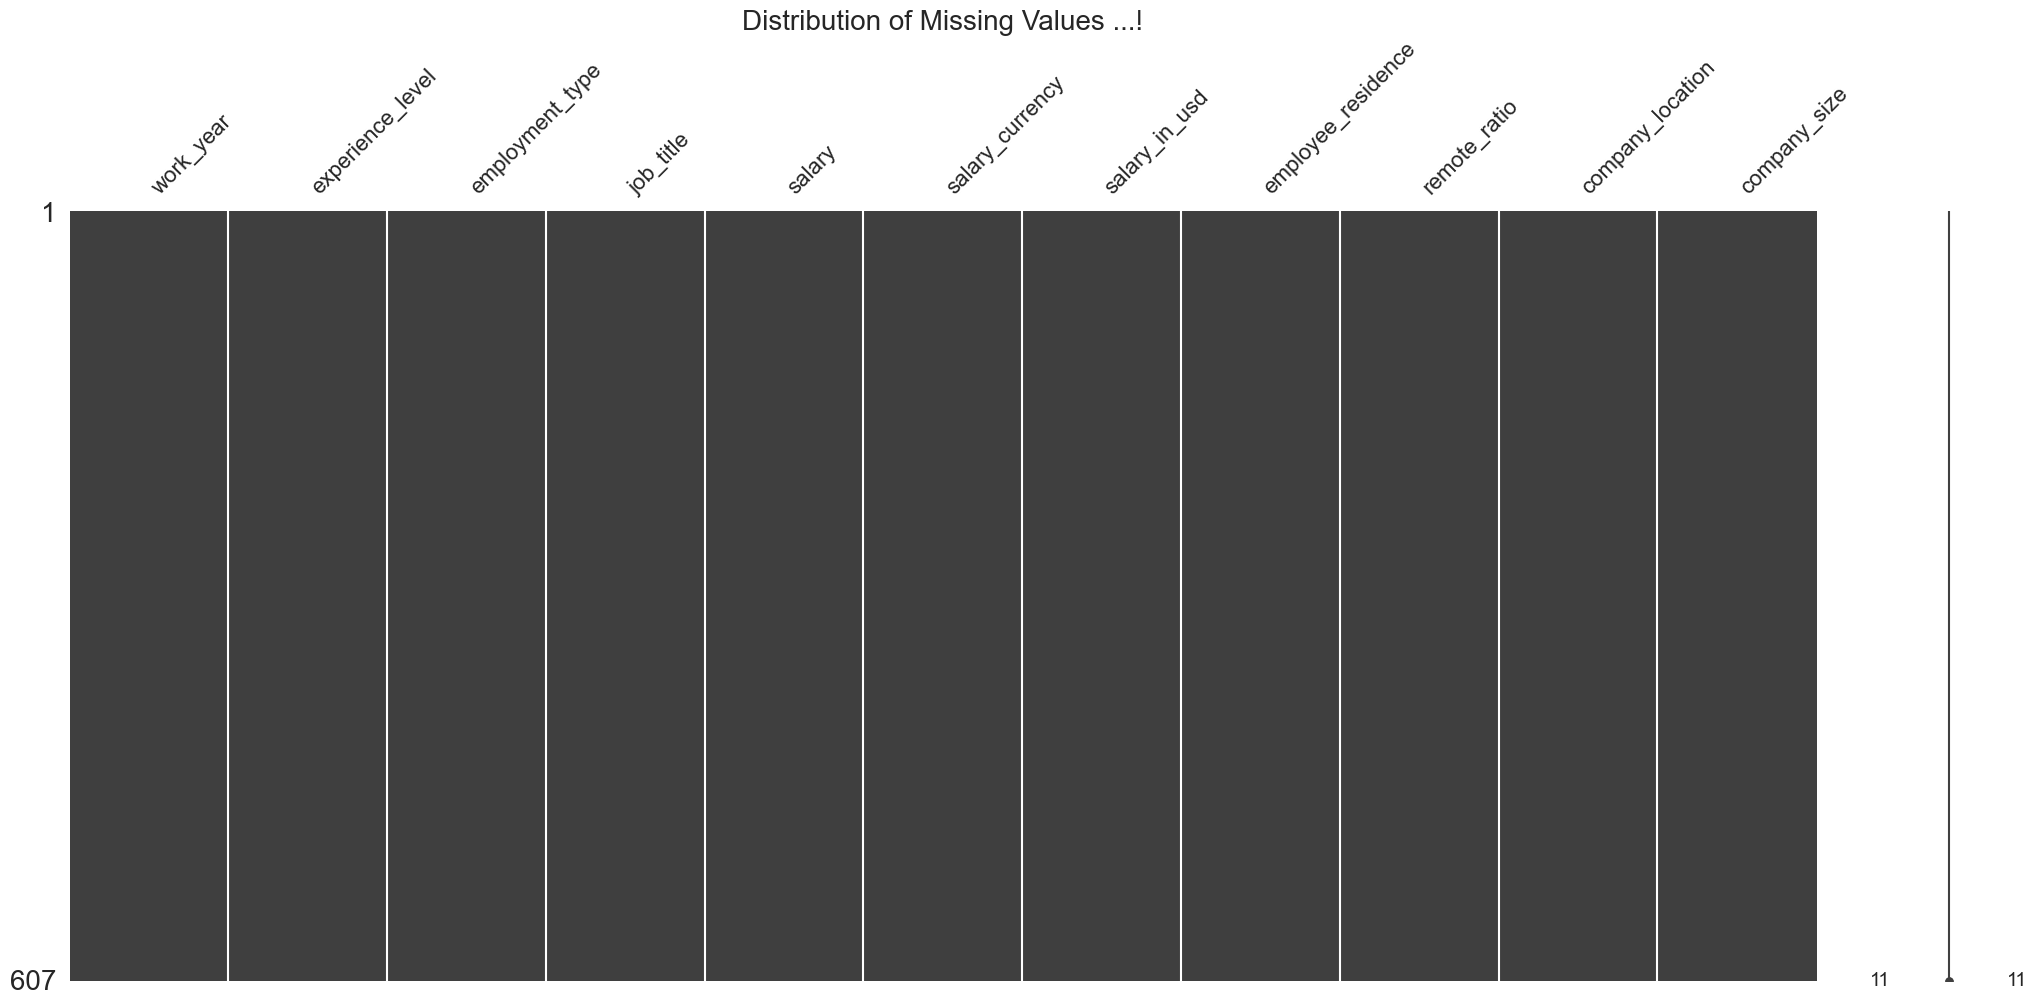

<Figure size 500x500 with 0 Axes>

In [53]:
# visualization of missing values
msno.matrix(df)
plt.title('Distribution of Missing Values ...!', fontsize=20)
plt.figure(figsize=(5,5))
plt.show()

And it is clear that there's **no missing** values in the dataset.

In [64]:
# unique values in the dataset
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64